In [1]:
import numpy as np

In [2]:
nsteps = 1000
# randint: 与えられた整数範囲内での整数乱数を返す
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [3]:
walk.min()

-3

In [4]:
walk.max()

52

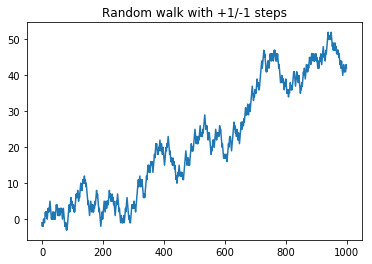

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.title('Random walk with +1/-1 steps')
plt.plot(walk)
plt.show()

In [6]:
# 多重ランダムウォーク
# 5000多重でランダムウォークする
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   1, ..., -14, -13, -12],
       [ -1,  -2,  -1, ..., -36, -37, -38],
       [  1,   2,   3, ...,  42,  43,  42],
       ..., 
       [ -1,   0,   1, ...,  -6,  -7,  -8],
       [  1,   0,   1, ...,   2,   3,   4],
       [  1,   0,  -1, ...,  20,  19,  20]])

In [7]:
walks.shape

(5000, 1000)

In [8]:
walks.max()

113

In [9]:
walks.min()

-117

In [10]:
# 多重の中で距離30までの初到時間を調べる
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ..., False,  True, False], dtype=bool)

In [11]:
# 5000件の多重の中で一つでも距離30まで到達した回数
hits30.sum()

3395

In [12]:
np.abs(walks[hits30]) >= 30

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [13]:
(np.abs(walks[hits30]) >= 30).argmax(1)

array([783, 779, 563, ..., 679, 449, 415])

In [14]:
# argmaxで一番最初に30に到達したインデックスを取得する(5000個ある)
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
# 5000個あるインデックスの平均を取得
# だいたい510回目で距離30に到達できることがわかる
crossing_times.mean()

509.92253313696614

In [15]:
# 補足
# np.random.normalの正規分布の形を変えることができる
# loc: 平均
# scale: 標準偏差
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))
steps

array([[ 0.4663488 ,  0.07288015, -0.04125422, ..., -0.27569748,
        -0.38973297, -0.18134396],
       [-0.18467616, -0.11003452, -0.44880907, ...,  0.38777865,
        -0.1550726 ,  0.06695617],
       [ 0.04547486,  0.17396946,  0.02704312, ...,  0.04514707,
        -0.13134474,  0.2172298 ],
       ..., 
       [ 0.07891677,  0.06733093,  0.00202131, ...,  0.11690746,
        -0.19022246,  0.21640629],
       [-0.18778341,  0.20214924,  0.67837723, ..., -0.14427085,
        -0.09309712, -0.06837415],
       [ 0.23716034, -0.21842201,  0.38911951, ...,  0.11414619,
        -0.1803138 , -0.11231599]])